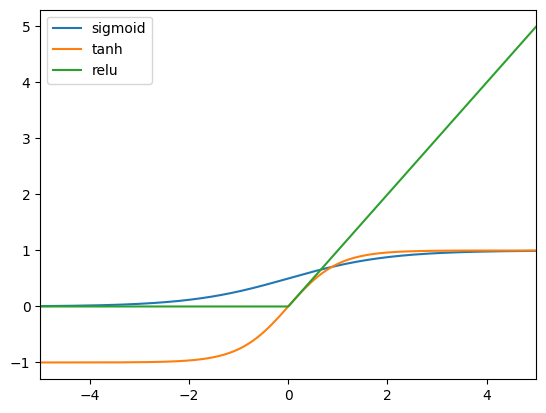

In [23]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 500)
sigmoid = 1/(1+np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(x, 0)
plt.figure()
plt.plot(x, sigmoid, label='sigmoid')
plt.plot(x, tanh, label='tanh')
plt.plot(x, relu, label='relu')
plt.legend(loc='best')
plt.xlim(-5, 5)
# plt.ylim(-1, 1)
plt.show()


反向传播算法

In [44]:
from numpy import exp, array, random, dot
class NeuralNetwork:
    def __init__(self):
        random.seed(0)
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
    def sigmoid(self, x):
        return 1/(1+exp(-x))
    def sigmoid_derivative(self, x):
        return x*(1-x)
    def input(self, inputs):
        return self.sigmoid(dot(inputs, self.synaptic_weights))
    def train(self, inputs, outputs, iterations):
        for it in range(iterations):
            output = self.input(inputs)
            error = outputs - output
            change = dot(inputs.T, error * self.sigmoid_derivative(output))
            self.synaptic_weights += change

In [52]:
nn = NeuralNetwork()
print(nn.synaptic_weights)
inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
outputs = array([[0, 1, 1, 0]]).T
nn.train(inputs, outputs, 20000)
print(nn.synaptic_weights)
print(nn.input(array([1, 0, 0])))

[[0.09762701]
 [0.43037873]
 [0.20552675]]
[[10.38031068]
 [-0.20662065]
 [-4.98434769]]
[0.99996896]


手写识别

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=33, test_size=0.25)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(x_train, y_train)
predicts = mlpc.predict(x_test)
from sklearn.metrics import classification_report
print('Accuracy:', mlpc.score(x_test, y_test))
print(classification_report(y_test, predicts, target_names=digits.target_names.astype(str)))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.96      1.00      0.98        54
           2       1.00      0.98      0.99        44
           3       1.00      0.96      0.98        46
           4       1.00      0.97      0.99        35
           5       1.00      0.96      0.98        48
           6       0.98      0.98      0.98        51
           7       0.97      1.00      0.99        35
           8       0.93      0.97      0.95        58
           9       0.98      1.00      0.99        44

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

